# <font color = "orange" > <b><i>Income Spent Clustering using K-Means</b>
<b><i>NAKKA SHEKHAR</b>
* [linkedin](https://www.linkedin.com/in/nakka-shekhar-2019a987/)
* [github](https://github.com/shekhar443/MACHINE-LEARNING-PROJECT)

### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Data Profiling / Data Loading

In [2]:
df=pd.read_csv("ML/dataset19.csv")

### Summarize Dataset

In [3]:
df.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


In [4]:
df.tail()

,INCOME,SPEND
298,241,123
299,264,132
300,193,141
301,131,115
302,236,174


In [5]:
df.shape

(303, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   INCOME  303 non-null    int64
 1   SPEND   303 non-null    int64
dtypes: int64(2)
memory usage: 4.9 KB


### Check Null Values and Duplicate Values

In [7]:
df.isnull().sum()

INCOME    0
SPEND     0
dtype: int64

In [8]:
df.duplicated().sum()

7

### Graphical Analysis

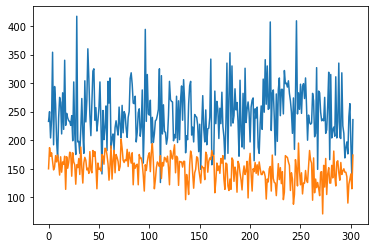

In [9]:
plt.plot(df)
plt.show()

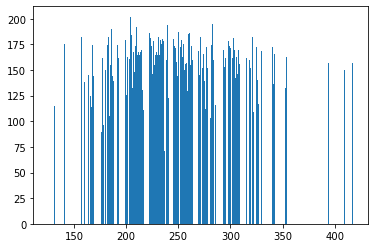

In [10]:
plt.bar(df.INCOME,df.SPEND)
plt.show()

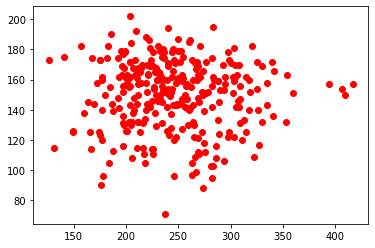

In [11]:
plt.scatter(df.INCOME,df.SPEND,c="red")
plt.show()

### Segregate & Zipping data

In [12]:
Income=df.INCOME.values
Spend=df.SPEND.values
X=np.array(list(zip(Income,Spend)))
X

array([[233, 150],
       [250, 187],
       [204, 172],
       [236, 178],
       [354, 163],
       [192, 148],
       [294, 153],
       [263, 173],
       [199, 162],
       [168, 174],
       [239, 160],
       [275, 139],
       [266, 171],
       [211, 144],
       [283, 162],
       [219, 158],
       [340, 172],
       [226, 114],
       [247, 171],
       [239, 151],
       [234, 161],
       [233, 179],
       [226, 178],
       [243, 137],
       [199, 178],
       [302, 162],
       [212, 157],
       [175, 123],
       [417, 157],
       [197, 152],
       [198, 168],
       [177, 140],
       [219, 188],
       [273, 152],
       [213, 125],
       [177, 160],
       [304, 170],
       [232, 165],
       [269, 148],
       [360, 151],
       [308, 142],
       [245, 180],
       [208, 148],
       [264, 143],
       [321, 182],
       [325, 172],
       [235, 180],
       [257, 156],
       [216, 115],
       [234, 160],
       [256, 149],
       [302, 151],
       [231,

### Finding the Optimized K Value

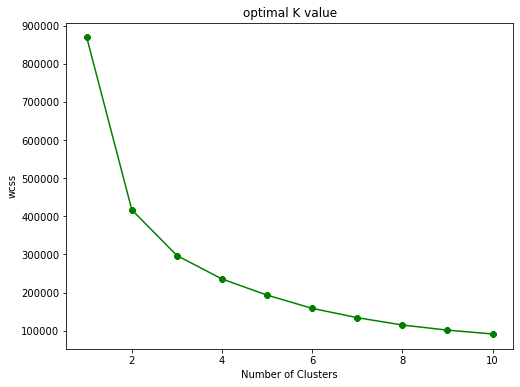

In [13]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss,color="green",marker="8")
plt.title("optimal K value")
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.show()

### Fitting the k-means to the dataset with k=4

In [14]:
model=KMeans(n_clusters=4, random_state=42)
y_means = model.fit_predict(X)

### Visualizing the clusters for k=4

Cluster 1: Customers with medium income and low spend

Cluster 2: Customers with high income and medium to high spend

Cluster 3: Customers with low income

Cluster 4: Customers with medium income but high spend

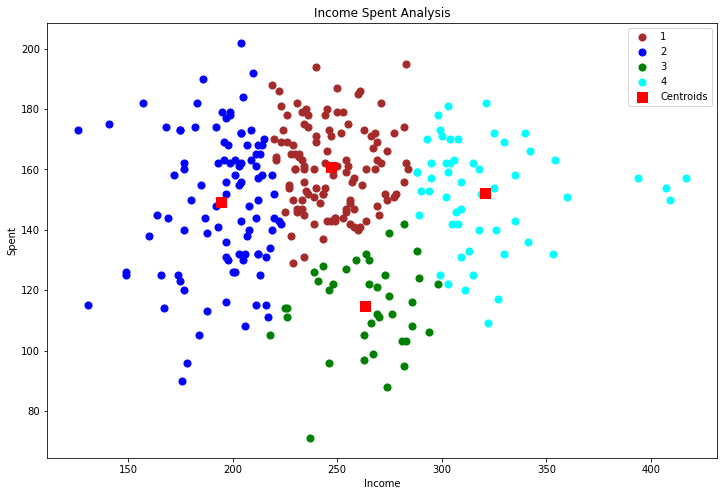

In [15]:
plt.figure(figsize=(12,8))
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='brown',label='1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='4')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],s=100,marker='s', c='red', label='Centroids')
plt.title('Income Spent Analysis')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.legend()
plt.show()